In [93]:
import os
import matplotlib.pyplot as plt

In [94]:
print(os.getcwd())

/Users/oscarsanchez


In [95]:
import pandas as pd
stats = pd.read_csv('/Users/oscarsanchez/Desktop/SDS/loan_applications.csv')

In [96]:
stats.head()

,application_id,application_date,age,gender,education,occupation,employment_length,income,loan_amount,loan_term,interest_rate,monthly_payment,credit_score,existing_loans,previous_defaults,city,default
0,1,2020-01-05,40,M,Master,Self-employed,13.573526,40298.38,95254.57,48,10.95,2459.46,781.0,0.0,0,CITY_22,0
1,2,2020-05-21,33,M,Bachelor,Salaried,3.061310,38167.11,140514.31,60,17.12,3501.53,687.0,1.0,0,CITY_41,0
2,3,2020-09-24,42,F,Bachelor,Unemployed,12.040059,8666.27,13340.61,60,11.89,296.01,795.0,0.0,0,CITY_68,0
3,4,2020-05-10,53,F,High School,Salaried,8.490862,33093.00,73008.42,60,12.89,1657.01,724.0,2.0,0,CITY_8,0
4,5,2020-05-15,32,M,Master,Salaried,0.782913,41115.42,51399.26,12,7.58,4461.24,510.0,0.0,0,CITY_33,1


In [97]:
cap_columns = []
for column in stats.columns:
    parts = column.split('_')
    cap_parts = [part.capitalize() for part in parts]
    text = "".join(cap_parts)
    cap_columns.append(text)
stats.columns = cap_columns

In [98]:
stats.Age < 40

0        False
1         True
2        False
3        False
4         True
         ...  
49995     True
49996     True
49997    False
49998     True
49999    False
Name: Age, Length: 50000, dtype: bool

In [99]:
educationFilter = (stats.Education == 'Bachelor')


In [100]:
type(educationFilter)

pandas.core.series.Series

In [101]:
# A filter that will select all rows that have a Bachelor degree in the Education column.
stats[educationFilter].head()

,ApplicationId,ApplicationDate,Age,Gender,Education,Occupation,EmploymentLength,Income,LoanAmount,LoanTerm,InterestRate,MonthlyPayment,CreditScore,ExistingLoans,PreviousDefaults,City,Default
1,2,2020-05-21,33,M,Bachelor,Salaried,3.061310,38167.11,140514.31,60,17.12,3501.53,687.0,1.0,0,CITY_41,0
2,3,2020-09-24,42,F,Bachelor,Unemployed,12.040059,8666.27,13340.61,60,11.89,296.01,795.0,0.0,0,CITY_68,0
6,7,2021-10-13,53,M,Bachelor,Business,7.889522,66501.01,166950.48,24,12.77,7918.88,744.0,3.0,0,CITY_11,0
8,9,2020-10-11,29,M,Bachelor,Business,6.069118,70037.05,112986.80,48,7.60,2737.38,811.0,3.0,0,CITY_20,1
10,11,2021-01-15,29,M,Bachelor,Salaried,9.735460,27781.31,42110.04,24,10.11,1945.34,608.0,0.0,0,CITY_18,0


In [102]:
ageFilter = stats.Age <= 40

In [103]:
stats[ageFilter].head()

,ApplicationId,ApplicationDate,Age,Gender,Education,Occupation,EmploymentLength,Income,LoanAmount,LoanTerm,InterestRate,MonthlyPayment,CreditScore,ExistingLoans,PreviousDefaults,City,Default
0,1,2020-01-05,40,M,Master,Self-employed,13.573526,40298.38,95254.57,48,10.95,2459.46,781.0,0.0,0,CITY_22,0
1,2,2020-05-21,33,M,Bachelor,Salaried,3.061310,38167.11,140514.31,60,17.12,3501.53,687.0,1.0,0,CITY_41,0
4,5,2020-05-15,32,M,Master,Salaried,0.782913,41115.42,51399.26,12,7.58,4461.24,510.0,0.0,0,CITY_33,1
5,6,2021-05-14,32,M,Other,Student,0.000000,8239.80,12788.40,48,10.84,329.55,715.0,0.0,0,CITY_39,0
8,9,2020-10-11,29,M,Bachelor,Business,6.069118,70037.05,112986.80,48,7.60,2737.38,811.0,3.0,0,CITY_20,1


In [104]:
stats[ageFilter & educationFilter]

,ApplicationId,ApplicationDate,Age,Gender,Education,Occupation,EmploymentLength,Income,LoanAmount,LoanTerm,InterestRate,MonthlyPayment,CreditScore,ExistingLoans,PreviousDefaults,City,Default
1,2,2020-05-21,33,M,Bachelor,Salaried,3.061310,38167.11,140514.31,60,17.12,3501.53,687.0,1.0,0,CITY_41,0
8,9,2020-10-11,29,M,Bachelor,Business,6.069118,70037.05,112986.80,48,7.60,2737.38,811.0,3.0,0,CITY_20,1
10,11,2021-01-15,29,M,Bachelor,Salaried,9.735460,27781.31,42110.04,24,10.11,1945.34,608.0,0.0,0,CITY_18,0
11,12,2021-02-16,29,F,Bachelor,Salaried,10.488172,52986.35,223276.76,12,12.85,19926.38,780.0,0.0,0,CITY_90,1
16,17,2020-03-07,22,F,Bachelor,Business,7.022286,36036.63,160089.00,12,16.81,14586.25,609.0,0.0,1,CITY_61,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49971,49972,2020-09-19,38,M,Bachelor,Business,5.863703,59003.75,171383.62,48,14.33,4711.92,NaN,0.0,0,CITY_32,0
49976,49977,2020-02-28,38,M,Bachelor,Salaried,1.744491,49046.67,87175.04,36,9.51,2792.94,701.0,2.0,0,CITY_42,0
49979,49980,2020-01-13,18,F,Bachelor,Self-employed,20.027411,34246.60,99581.80,60,13.22,2277.12,657.0,1.0,0,CITY_50,0
49980,49981,2021-12-07,35,M,Bachelor,Retired,23.420524,9543.12,41101.22,60,15.07,979.20,634.0,1.0,0,CITY_22,0


In [105]:
stats[(stats.Occupation == 'Self-employed') & educationFilter].head()

,ApplicationId,ApplicationDate,Age,Gender,Education,Occupation,EmploymentLength,Income,LoanAmount,LoanTerm,InterestRate,MonthlyPayment,CreditScore,ExistingLoans,PreviousDefaults,City,Default
65,66,2020-03-20,51,M,Bachelor,Self-employed,5.472662,95302.32,323098.28,24,12.11,15225.85,652.0,1.0,0,CITY_63,1
79,80,2021-06-15,18,F,Bachelor,Self-employed,2.529777,49404.25,124941.64,12,17.01,11396.15,751.0,2.0,0,CITY_47,0
97,98,2020-04-24,38,M,Bachelor,Self-employed,6.633793,25926.40,49077.23,60,14.34,1150.67,700.0,0.0,0,CITY_3,0
99,100,2020-02-04,32,M,Bachelor,Self-employed,8.281658,54639.40,124796.31,48,12.36,3308.31,743.0,1.0,0,CITY_90,0
117,118,2020-05-15,20,M,Bachelor,Self-employed,12.028680,56059.26,147587.74,36,11.68,4879.81,697.0,2.0,0,CITY_27,0


Accessing individual elements

In [107]:
# Method used by specifying the start of the row and up to the end of the same row and name of the column
stats[1:2]['Occupation']

1    Salaried
Name: Occupation, dtype: object

In [108]:
# Method used .iat for integer location (using row index and column index)
stats.iat[1,5]

'Salaried'

In [109]:
# Method that uses  labels rows(indexes) and columns(column names) to get a cell's value
stats.at[1, 'Occupation']

'Salaried'

Introduction to Seaborn

In [171]:
statsSmall = stats.head(500)


In [112]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = 25, 8
cap_columns = []
import warnings
warnings.filterwarnings('ignore')

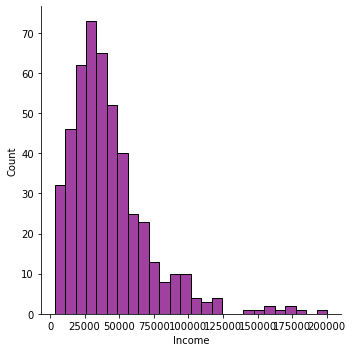

In [113]:
#Distribution
vis1 = sns.displot(statsSmall['Income'], color='purple')

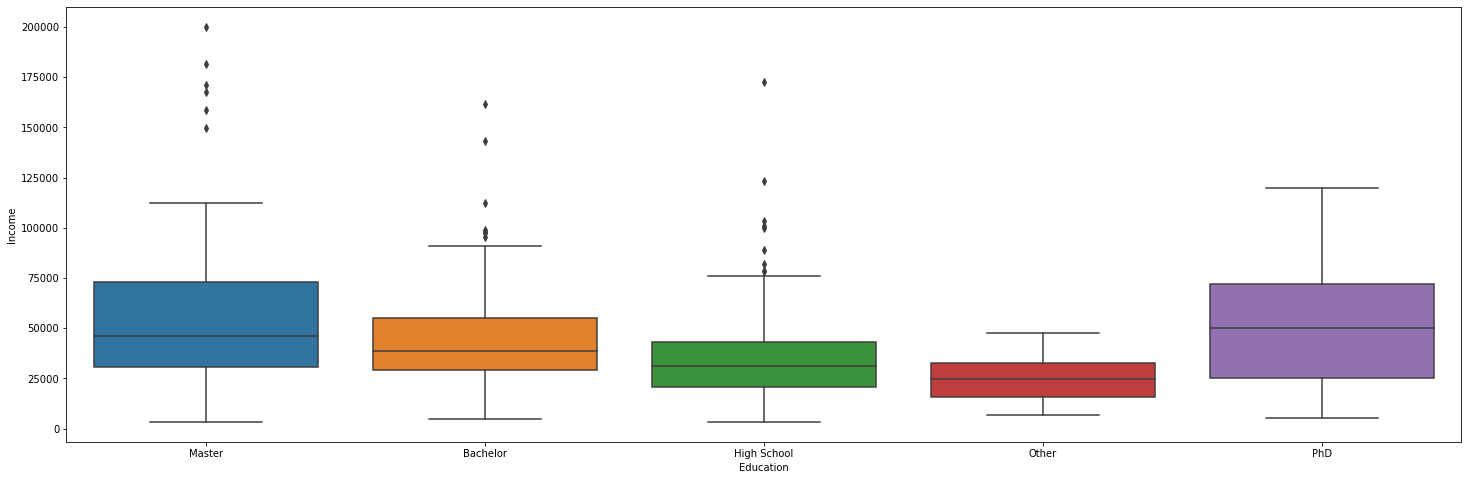

In [114]:
#Boxplots:
vis2 = sns.boxplot(data=statsSmall, x='Education', y='Income')

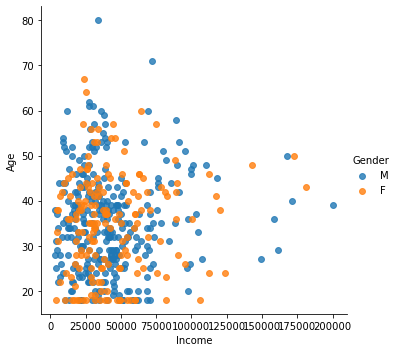

In [170]:
vis3 = sns.lmplot(data=statsSmall, x='Income', y='Age', markers='o', fit_reg=False, hue='Gender', scatter_kws={'s': 35})

In [116]:
statsSmall.City

0      CITY_22
1      CITY_41
2      CITY_68
3       CITY_8
4      CITY_33
        ...   
495    CITY_47
496    CITY_50
497    CITY_72
498    CITY_56
499     CITY_9
Name: City, Length: 500, dtype: object

In [117]:
statsSmall.ApplicationDate

0      2020-01-05
1      2020-05-21
2      2020-09-24
3      2020-05-10
4      2020-05-15
          ...    
495    2021-07-12
496    2021-06-12
497    2021-06-16
498    2021-02-06
499    2020-09-21
Name: ApplicationDate, Length: 500, dtype: object

In [118]:
stats['ApplicationDate'] = pd.to_datetime(stats['ApplicationDate'])

: 

In [119]:
statsSmall.ApplicationDate

0      2020-01-05
1      2020-05-21
2      2020-09-24
3      2020-05-10
4      2020-05-15
          ...    
495    2021-07-12
496    2021-06-12
497    2021-06-16
498    2021-02-06
499    2020-09-21
Name: ApplicationDate, Length: 500, dtype: object

In [120]:
stats['month'] = stats['ApplicationDate'].dt.month
stats['year'] = stats['ApplicationDate'].dt.year
stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ApplicationId     50000 non-null  int64         
 1   ApplicationDate   50000 non-null  datetime64[ns]
 2   Age               50000 non-null  int64         
 3   Gender            50000 non-null  object        
 4   Education         50000 non-null  object        
 5   Occupation        50000 non-null  object        
 6   EmploymentLength  42840 non-null  float64       
 7   Income            47555 non-null  float64       
 8   LoanAmount        50000 non-null  float64       
 9   LoanTerm          50000 non-null  int64         
 10  InterestRate      50000 non-null  float64       
 11  MonthlyPayment    50000 non-null  float64       
 12  CreditScore       47422 non-null  float64       
 13  ExistingLoans     47487 non-null  float64       
 14  PreviousDefaults  5000

In [122]:
# Categorize features
numerical_features = ['Age', 'Income', 'LoanAmount', 'LoanTerm', 'InterestRate', 'MonthlyPayment', 'CreditScore', 'EmploymentLength']
categorical_features= ['Gender', 'Education', 'Occupation', 'City']
temporal_features = ['ApplicationDate']
target = 'Default'

In [123]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

Data Cleaning and Missing Values
1.  Learn how to handle missing values asppropriately
2.  Understand different imputation strategies
3.  Implement data cleaning techniques

Analyze missing values

In [124]:
missing_values = stats.isnull().sum()
missing_percentages = (missing_values/len(stats)) * 100

Print Missing Values

Missing values analyzes

In [125]:
for column, percentage in missing_percentages[missing_percentages > 0].items():
  print(f"{column}: {percentage:.2f}%")

EmploymentLength: 14.32%
Income: 4.89%
CreditScore: 5.16%
ExistingLoans: 5.03%


Visualize missing value paterns

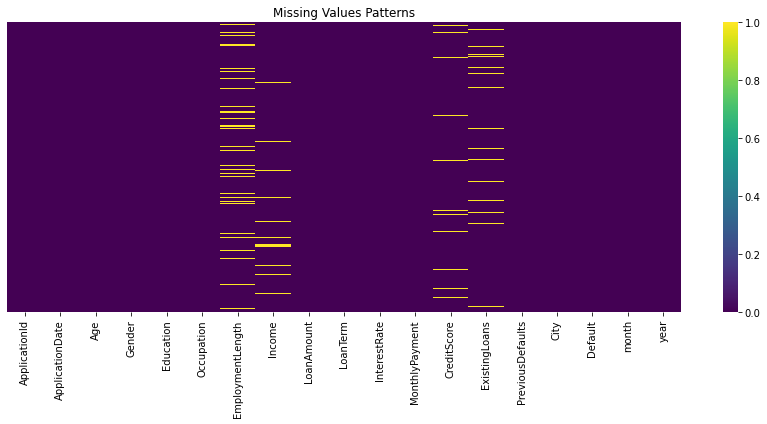

In [126]:
plt.figure(figsize=(12,6))
sns.heatmap(stats.isnull(), yticklabels=False, cbar=True, cmap='viridis')
plt.title('Missing Values Patterns')
plt.tight_layout()
plt.show()

Create a copy of dataframe for cleaning

In [127]:
stats_clean = stats.copy()

Handle UnemploymentLength missing values
Strategy: Use median for different education levels

In [128]:
print('\nMedian EmploymentLength by Education level:')
print(stats.groupby('Education')['EmploymentLength'].median())


Median EmploymentLength by Education level:
Education
Bachelor       7.970018
High School    7.952542
Master         8.036012
Other          8.181292
PhD            7.941047
Name: EmploymentLength, dtype: float64


Fill in missing cells for column EmploymentLength with the median off all those with same education level

In [129]:
for education in stats['Education'].unique():
  mask = stats_clean['Education'] == education
  median_edu_length = stats[mask]['EmploymentLength'].median()
  stats_clean.loc[mask & stats_clean['EmploymentLength'].isnull(), 'EmploymentLength'] = median_edu_length

In [130]:
missing_values_clean = stats_clean.isnull().sum()
missing_percentages_clean = (missing_values/len(stats)) * 100
for column, percentage in missing_percentages_clean[missing_percentages_clean > 0].items():
  print(f"{column}: {percentage:.2f}%")

EmploymentLength: 14.32%
Income: 4.89%
CreditScore: 5.16%
ExistingLoans: 5.03%


Fill in missing cells for Income via both columns Education and Occupation with medians


In [131]:
print('Median Income by Education and Occupation: ')
print(stats.groupby(['Education', 'Occupation'])['Income'].median().head())

Median Income by Education and Occupation: 
Education  Occupation   
Bachelor   Business         50463.64
           Retired          25748.04
           Salaried         36141.72
           Self-employed    42693.90
           Student          11121.33
Name: Income, dtype: float64


In [138]:
for(edu, occ) in stats.groupby(['Education', 'Occupation'])['Income'].groups:
  mask = (stats_clean['Education'] == edu) & (stats_clean['Occupation'] == occ)
  median_income = stats[mask]['Income'].median()
  stats_clean.loc[mask & stats_clean['Income'].isnull(), 'Income'] = median_income

In [139]:
missing_values_clean = stats_clean.isnull().sum()
missing_percentages_clean = (missing_values_clean/len(stats)) * 100
for column, percentage in missing_percentages_clean[missing_percentages_clean > 0].items():
  print(f"{column}: {percentage:.2f}%")

CreditScore: 5.16%
ExistingLoans: 5.03%


Handle CreditScore's missing values.


Strategy: Use simple Imputer with median Strategy

In [142]:
credit_imputer = SimpleImputer(strategy='median')
stats_clean['CreditScore'] = credit_imputer.fit_transform(stats_clean[['CreditScore']])

In [143]:
missing_values_clean = stats_clean.isnull().sum()
missing_percentages_clean = (missing_values_clean/len(stats)) * 100
for column, percentage in missing_percentages_clean[missing_percentages_clean > 0].items():
  print(f"{column}: {percentage:.2f}%")

ExistingLoans: 5.03%


Handle ExistingLoans missing values

Strategy: Fill with 0 (assume no existing loans if not specified)

In [144]:
stats_clean['ExistingLoans'] = stats_clean['ExistingLoans'].fillna(0)

In [145]:
missing_values_clean = stats_clean.isnull().sum()
missing_percentages_clean = (missing_values_clean/len(stats)) * 100
for column, percentage in missing_percentages_clean[missing_percentages_clean > 0].items():
  print(f"{column}: {percentage:.2f}%")